In [1]:
import os

network_path = os.path.join("networks", "input_tuning_verification")

In [2]:
from snudda.init import SnuddaInit
si = SnuddaInit(network_path=network_path, struct_def={})

si.define_striatum(num_dSPN=16, num_iSPN=16, num_FS=16, num_LTS=2, num_ChIN=2,
                   volume_type="cube")
si.write_json()

Using cube for striatum
Adding neurons: FS from dir $SNUDDA_DATA/neurons/striatum/fs
Adding neurons: dSPN from dir $SNUDDA_DATA/neurons/striatum/dspn
Adding neurons: iSPN from dir $SNUDDA_DATA/neurons/striatum/ispn
Adding neurons: ChIN from dir $SNUDDA_DATA/neurons/striatum/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002],[-0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[-0.0001],[3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[0.0001],[3.e-05]) = [1.84256218e-10]
LTS axon density P([0.0009],[-0.0001],[-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009],[-0.0001],[3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009],[0.0001],[-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009],[0.0001],[3.e-05]) = [1.72360142e-23]
Adding neurons: LTS from dir $SNUDDA_DATA/neurons/striatum/lts
Writing networks/input_tuning_verification/network-config.json


In [3]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [4]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

Instantiates par_id = 0
morph_tag = optim_chin_morph_renamed2019-11-08.swc
Instantiates par_id = 0
morph_tag = lts_morp_2019-11-07_centered_no_axon.swc
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 36/125 (52 neurons)
Processing hyper voxel : 31/125 (52 neurons)
Processing hyper voxel : 32/125 (49 neurons)
Processing hyper voxel : 37/125 (45 neurons)
Processing hyper voxel : 56/125 (44 neurons)
Processing hyper voxel : 61/125 (38 neurons)
Processing hyper voxel : 6/125 (29 neurons)
Processing hyper voxel : 57/125 (27 neurons)
Processing hyper voxel : 62/125 (25 neurons)
Processing hyper voxel : 30/125 (24 neurons)
Processing hyper voxel : 11/125 (22 neurons)
Processing hyper voxel : 26/125 (20 neurons)
Processing hyper voxel : 35/125 (16 neurons)
Processing hyper voxel : 7/125 (12 neurons)
Processing hyper voxel : 27/125 (8 neurons)
Processing hyper voxel : 55/125 (8 neurons)
Processing hyper voxel : 12/125 (7 neurons)
Processing hyper voxel : 1/125

In [5]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()

Read 29255 out of total 29255 synapses
Read 653 out of total 653 synapses


In [7]:
from snudda.input import SnuddaInput
sin = SnuddaInput(network_path=network_path, 
                  input_config_file=os.path.join("$SNUDDA_DATA", "input_config", 
                                                 "external-input-dSTR-scaled-v4.json"))
sin.generate()

Writing spikes to networks/input_tuning_verification/input-spikes.hdf5


Run the simulation in the terminal window using
```
mpiexec snudda simulate networks/input_tuning_verification
```

Loading 52 neurons with 3073 synapses and 389 gap junctions
Sort the traces
Sort the traces


<IPython.core.display.Javascript object>


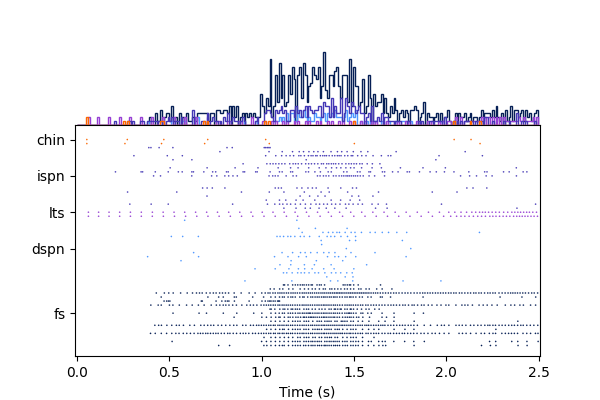

fs (16): 24.682581006929148 Hz, total spikes 986
dspn (16): 2.9038330596387234 Hz, total spikes 116
lts (2): 23.030400128169187 Hz, total spikes 115
ispn (16): 8.060640044859214 Hz, total spikes 322
chin (2): 2.8037008851684226 Hz, total spikes 14
Saving networks/input_tuning_verification/figures/network-output-spikes-666-colour.pdf


In [8]:
%matplotlib notebook

from snudda.plotting.plot_spike_raster import PlotSpikeRaster

network_file = os.path.join(network_path, "network-synapses.hdf5")
spike_file = os.path.join(network_path, "simulation", "network-output-spikes-666.txt")
type_order = ["fs", "dspn", "lts", "ispn", "chin"]

psr = PlotSpikeRaster(spike_file_name=spike_file, network_file=network_file,
                      type_order=type_order)

In [9]:
from snudda.utils import SnuddaLoadSpikeData
slsd = SnuddaLoadSpikeData(spike_data_file=spike_file, network_file=network_file)
slsd.print_freq_info(time_range=(0,1))

Loading 52 neurons with 3073 synapses and 389 gap junctions
Time range 0 to 1
ChIN_0 (33) 4.0 Hz in time range (0, 1)
ChIN_0 (50) 4.0 Hz in time range (0, 1)
FS_0 (51) 0.0 Hz in time range (0, 1)
FS_0 (30) 13.0 Hz in time range (0, 1)
FS_0 (16) 0.0 Hz in time range (0, 1)
FS_0 (14) 0.0 Hz in time range (0, 1)
FS_1 (43) 7.0 Hz in time range (0, 1)
FS_1 (22) 0.0 Hz in time range (0, 1)
FS_1 (20) 6.0 Hz in time range (0, 1)
FS_1 (19) 1.0 Hz in time range (0, 1)
FS_2 (45) 22.0 Hz in time range (0, 1)
FS_2 (29) 24.0 Hz in time range (0, 1)
FS_2 (11) 34.0 Hz in time range (0, 1)
FS_2 (15) 28.0 Hz in time range (0, 1)
FS_3 (47) 0.0 Hz in time range (0, 1)
FS_3 (0) 2.0 Hz in time range (0, 1)
FS_3 (10) 0.0 Hz in time range (0, 1)
FS_3 (7) 1.0 Hz in time range (0, 1)
LTS_0 (8) 16.0 Hz in time range (0, 1)
LTS_0 (42) 16.0 Hz in time range (0, 1)
dSPN_0 (46) 0.0 Hz in time range (0, 1)
dSPN_0 (2) 1.0 Hz in time range (0, 1)
dSPN_0 (41) 3.0 Hz in time range (0, 1)
dSPN_0 (32) 0.0 Hz in time range 

In [10]:
slsd.print_freq_info(time_range=(1,1.5))


Time range 1 to 1.5
ChIN_0 (33) 2.0 Hz in time range (1, 1.5)
ChIN_0 (50) 2.0 Hz in time range (1, 1.5)
FS_0 (51) 46.0 Hz in time range (1, 1.5)
FS_0 (30) 20.0 Hz in time range (1, 1.5)
FS_0 (16) 56.0 Hz in time range (1, 1.5)
FS_0 (14) 60.0 Hz in time range (1, 1.5)
FS_1 (43) 70.0 Hz in time range (1, 1.5)
FS_1 (22) 64.0 Hz in time range (1, 1.5)
FS_1 (20) 78.0 Hz in time range (1, 1.5)
FS_1 (19) 78.0 Hz in time range (1, 1.5)
FS_2 (45) 88.0 Hz in time range (1, 1.5)
FS_2 (29) 84.0 Hz in time range (1, 1.5)
FS_2 (11) 86.0 Hz in time range (1, 1.5)
FS_2 (15) 86.0 Hz in time range (1, 1.5)
FS_3 (47) 46.0 Hz in time range (1, 1.5)
FS_3 (0) 70.0 Hz in time range (1, 1.5)
FS_3 (10) 52.0 Hz in time range (1, 1.5)
FS_3 (7) 66.0 Hz in time range (1, 1.5)
LTS_0 (8) 18.0 Hz in time range (1, 1.5)
LTS_0 (42) 18.0 Hz in time range (1, 1.5)
dSPN_0 (46) 6.0 Hz in time range (1, 1.5)
dSPN_0 (2) 8.0 Hz in time range (1, 1.5)
dSPN_0 (41) 30.0 Hz in time range (1, 1.5)
dSPN_0 (32) 2.0 Hz in time range 